In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [4]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    'Train',
    shuffle=True,
    image_size=(512,512),
    batch_size=32
    )
vaild_data=tf.keras.preprocessing.image_dataset_from_directory(
    'val',
    shuffle=True,
    image_size=(512,512),
    batch_size=32
    )
print(len(train_data),len(vaild_data))

Found 4737 files belonging to 4 classes.
Found 512 files belonging to 4 classes.
149 16


In [5]:
disease_name=train_data.class_names
disease_name
val_d_name=vaild_data.class_names
val_d_name

['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

In [6]:
for img,lab in train_data.take(1):
    print(img.shape)
    print(lab.numpy())

(32, 512, 512, 3)
[1 3 1 1 3 3 0 1 1 3 2 0 1 3 3 2 3 2 3 2 0 2 2 3 1 1 1 1 1 0 1 3]


In [7]:
for img,lab in train_data.take(1):
    print(img[0].numpy())
    

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [8]:
import matplotlib.pyplot  as plt 
import seaborn as sns


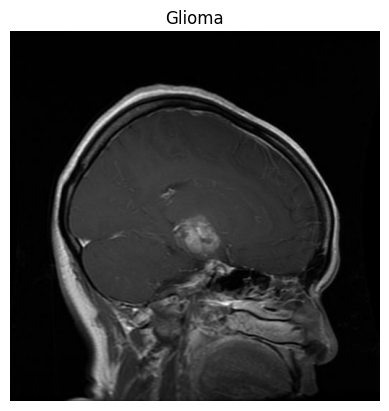

In [9]:
for img,lab in train_data.take(1):   
    plt.imshow(img[0].numpy().astype("uint8"))
    plt.title(disease_name[lab[0]])
    plt.axis("off")

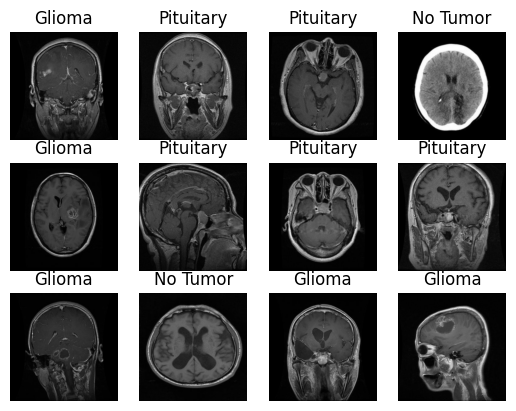

In [10]:
for img,lab in train_data.take(1):
    for i in range (12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(disease_name[lab[i]])
        plt.axis("off")

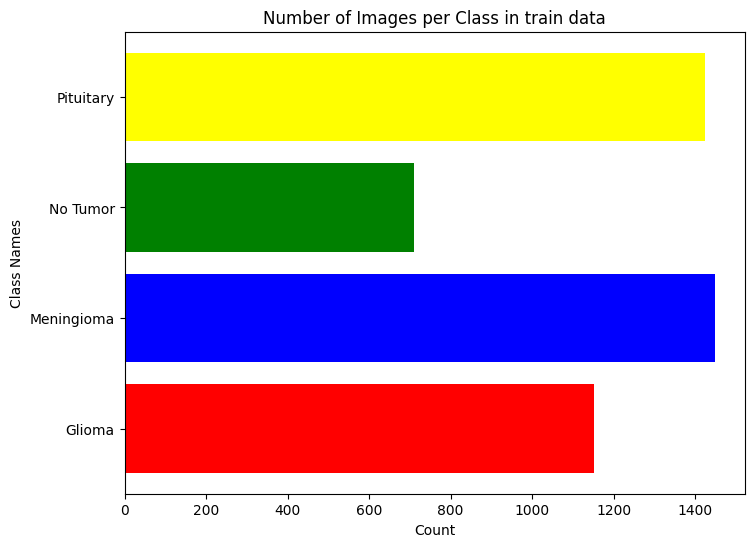

In [11]:
class_counts = {class_name: 0 for class_name in disease_name}
for images, labels in train_data:
    for label in labels:
        class_counts[disease_name[label]] += 1
colors = ['red', 'blue', 'green', 'yellow']

plt.figure(figsize=(8, 6))
plt.barh(list(class_counts.keys()), list(class_counts.values()), color=colors)
plt.xlabel('Count')
plt.ylabel('Class Names')
plt.title('Number of Images per Class in train data')
plt.show()

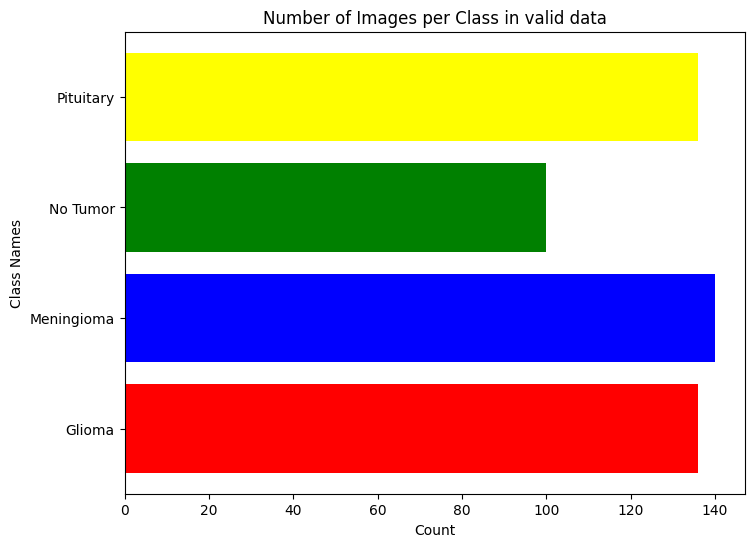

In [12]:
class_counts = {class_name: 0 for class_name in disease_name}
for images, labels in vaild_data:
    for label in labels:
        class_counts[disease_name[label]] += 1
colors = ['red', 'blue', 'green', 'yellow']

plt.figure(figsize=(8, 6))
plt.barh(list(class_counts.keys()), list(class_counts.values()), color=colors)
plt.xlabel('Count')
plt.ylabel('Class Names')
plt.title('Number of Images per Class in valid data')
plt.show()

In [13]:
test_size=0.5
len(vaild_data)*test_size

8.0

In [14]:
test_data=vaild_data.take(8)
val_data=vaild_data.take(8)

In [15]:
print(len(test_data),len(val_data),len(train_data))


8 8 149


In [16]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(512,512),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [19]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])


In [20]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 512, 512, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 510, 510, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 255, 255, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 253, 253, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 126, 126, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 124, 124, 64)       

In [22]:
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_data,
    epochs=5,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_data
)

Epoch 1/5


In [ ]:
model.evaluate(test_data)

8/8 [==============================] - 6s 660ms/step - loss: 0.2270 - accuracy: 0.9297


[0.2269718199968338, 0.9296875]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

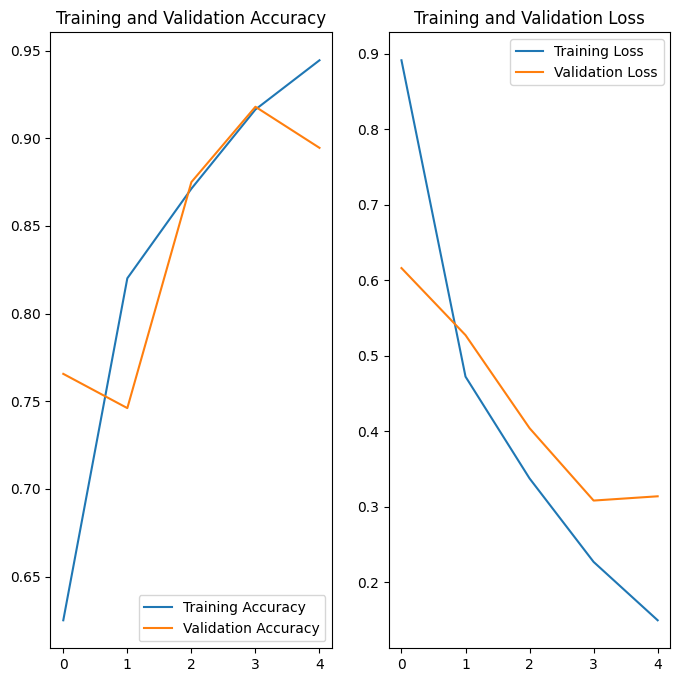

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Meningioma
1/1 [==============================] - 1s 938ms/step
predicted label: Meningioma


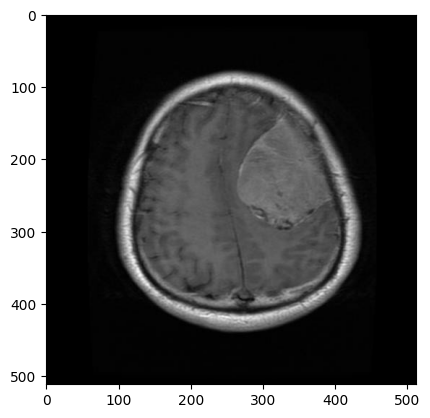

In [ ]:
import numpy as np
for images_batch, labels_batch in test_data.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",disease_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",disease_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = disease_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1/1 [==============================] - 0s 97ms/step


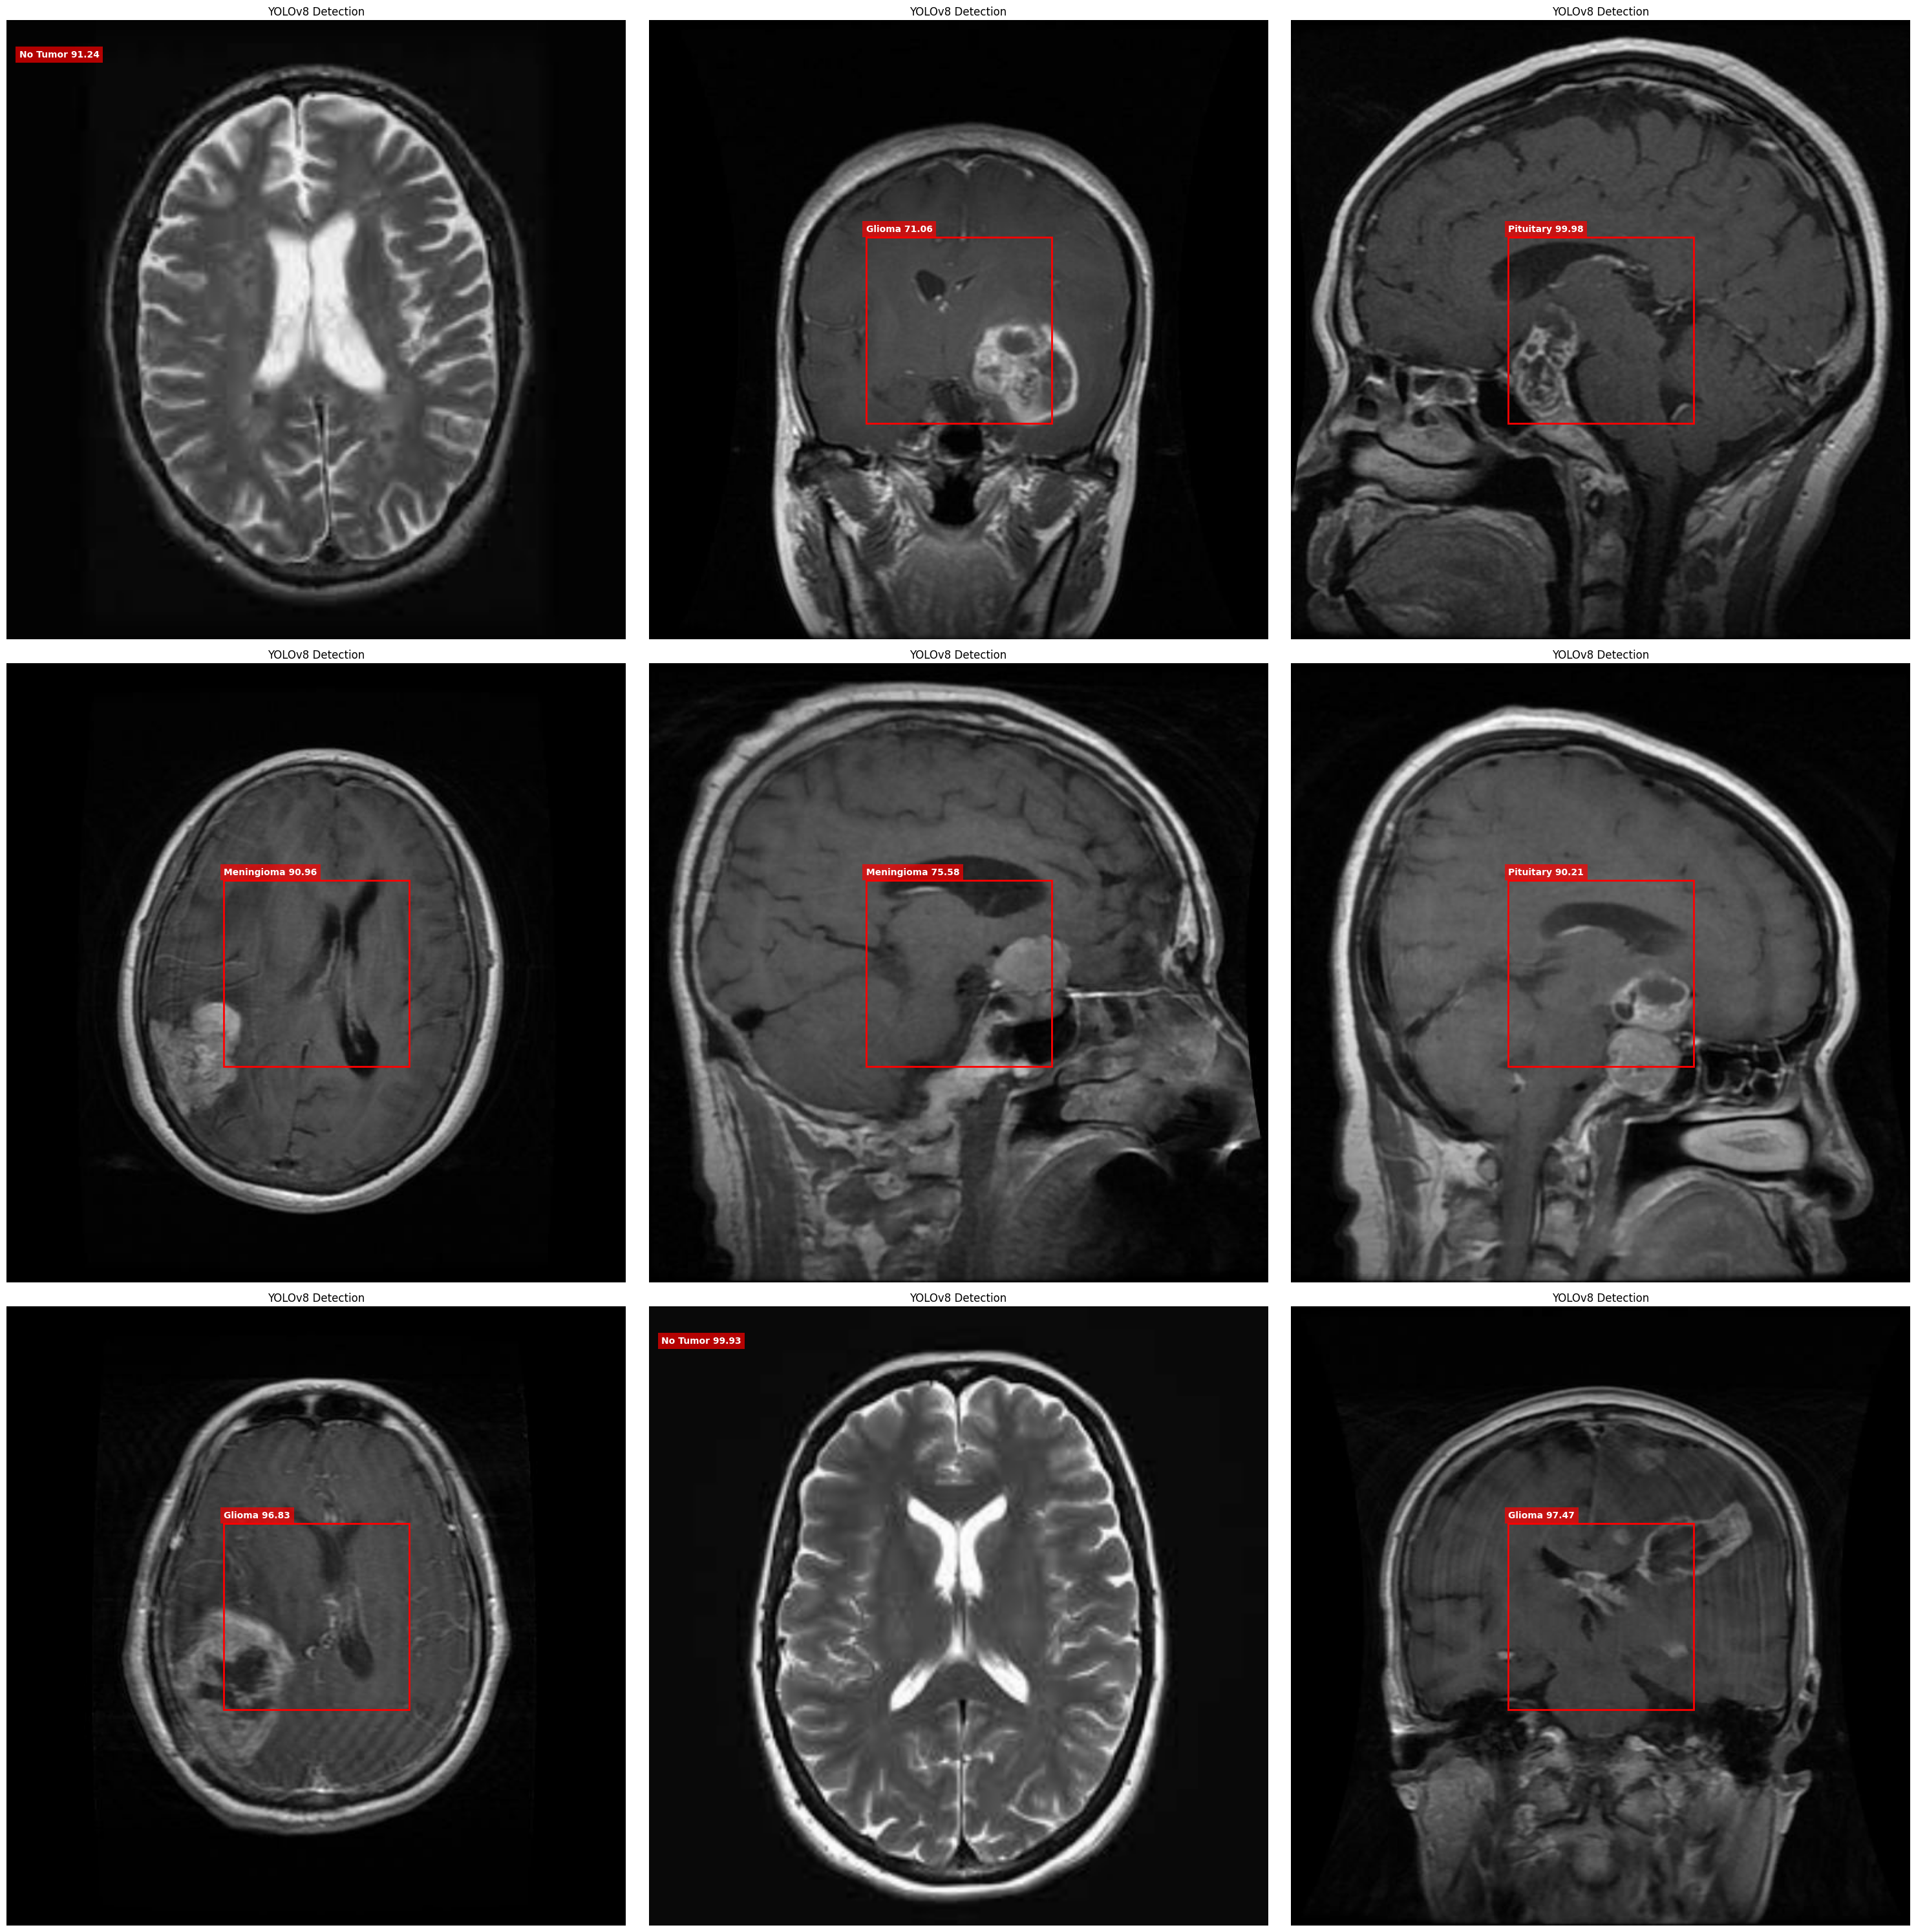

In [ ]:
plt.figure(figsize=(30, 30))

for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")
        plt.imshow(img, cmap='gray')
        
        predicted_class, confidence = predict(model, img)
        actual_class = disease_name[labels[i]]
        
        if actual_class != "No Tumor":
            height, width = img.shape[:2]
            box_width, box_height = width * 0.3, height * 0.3
            x, y = width * 0.35, height * 0.35
            
            rect = patches.Rectangle((x, y), box_width, box_height, 
                                     linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            
            label = f"{predicted_class} {confidence:.2f}"
            plt.text(x, y-5, label, color='white', fontweight='bold', 
                     bbox=dict(facecolor='red', edgecolor='none', alpha=0.7))
        else:
            plt.text(10, 30, f"No Tumor {confidence:.2f}", color='white', fontweight='bold', 
                     bbox=dict(facecolor='red', edgecolor='none', alpha=0.7))
        
        plt.title(f"YOLOv8 Detection", fontsize=12)
        plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import os
os.listdir()
model_version="conv2D"
model.save("models/{model_version}")

NameError: name 'model' is not defined

'docker' is not recognized as an internal or external command,
operable program or batch file.
